## Hello 텐서플로 2.0

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x ## %는 매직커맨드 텐서플로 버전을 선택하는 기능
except Exception:
  pass
import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x ## %는 매직커맨드 텐서플로 버전을 선택하는 기능`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import tensorflow as tf ## as는 모듈 이름 줄이는 명령어 as로 줄이면 원래 단어 치면 오류남
print(tf.__version__)

2.3.0


## 텐서플로 기초

### 난수 생성

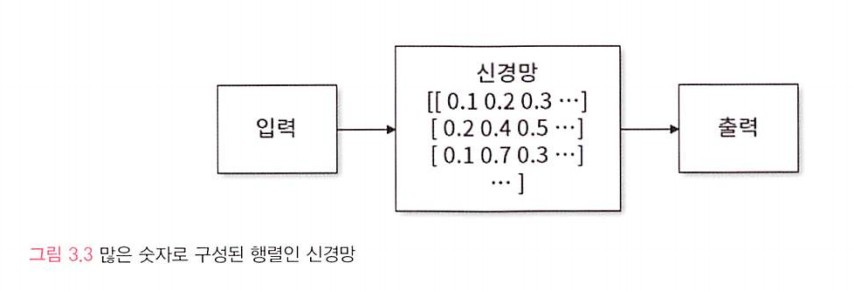

행렬을 구성하는데 초기에는 랜덤값을 넣을수밖에 없다.
초깃값을 지정하는걸 초기화라고 한다.
Xavier초기화, He초기화가 유명하다.
랜덤하지만 어느정도 규칙성이 있은 범위내에서 난수를 지정한다.

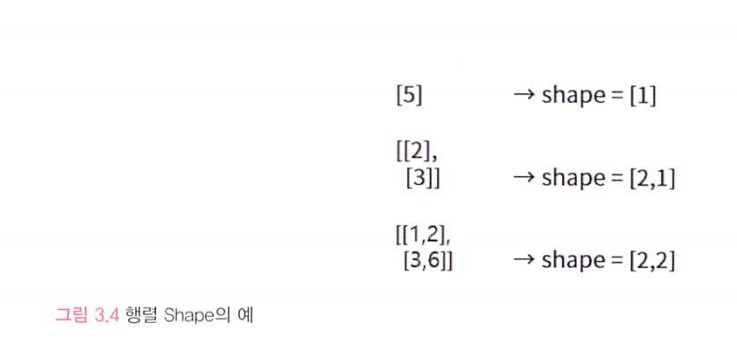

shape는 행렬을 구성하는 행, 열 등 차원의 수를 나타내는 값
print를 써도 되지만 직접 원소를 셀수도 있다

In [ ]:
rand = tf.random.uniform([1],0,1) ### 이 함수를 사용하면 균일분포 난수 얻을수 있다. [1] = 결과값의 shape를 의미한다
print(rand)

tf.Tensor([0.18536758], shape=(1,), dtype=float32)


0과 1 사이에 모든수가 나올 확률이 동일한 분포에서 난수 하나를 뽑음
(1,)는 튜플임을 나타냄 이 값은 [1]과 같은값임
data type을 나타냄 float32는 부동소수점 32비트를 뜻함

In [ ]:
rand = tf.random.uniform([4],0,1)
print(rand)

tf.Tensor([0.8722154  0.9583887  0.15816236 0.72020483], shape=(4,), dtype=float32)


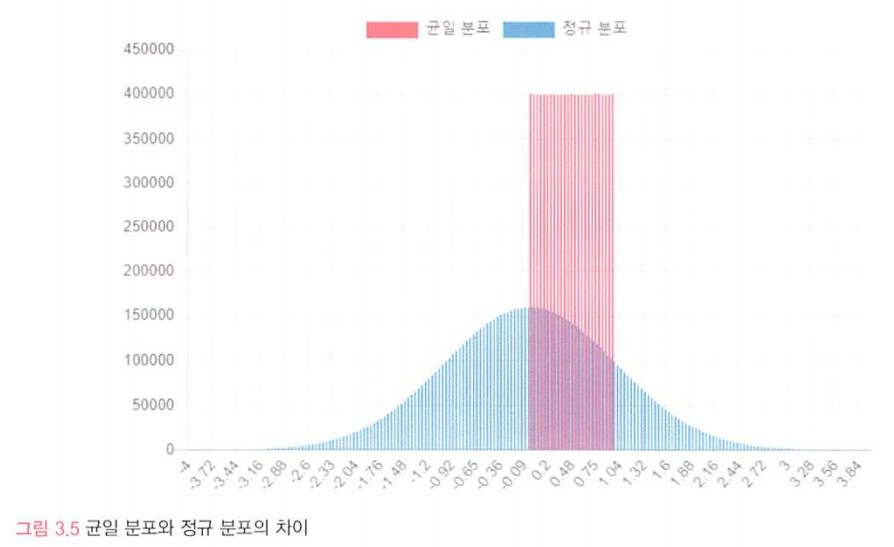

정규분포는 normal로 바꾸면 된다
양극단으로 갈수록 낮아져 종모양을 그리는 분포

In [ ]:
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([ 0.12168586 -3.343493    1.732137   -0.48950395], shape=(4,), dtype=float32)


### 뉴런 만들기

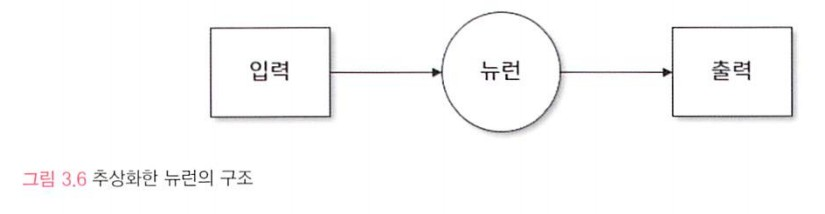

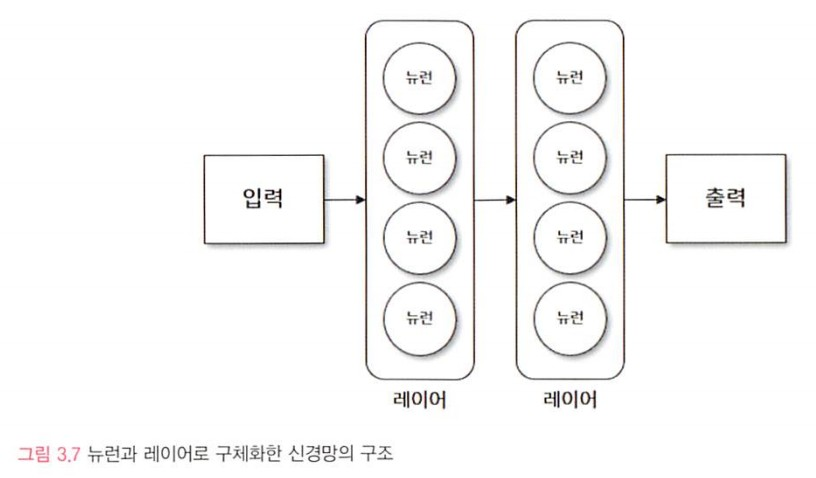

신경망은 뉴런이 여러개 모여 레이어를 구성 한 후 레이어가 다시 모여 구성된 형태
신경세포, 층 이라고 할수있다.

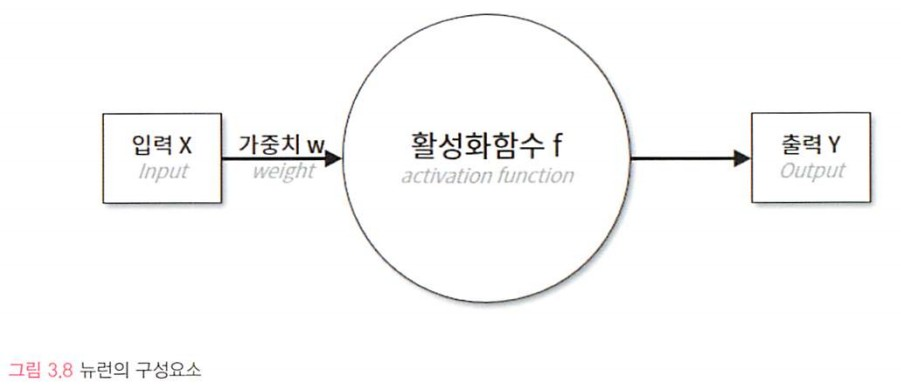

입력, 가중치, 출력은 보통 정수(integer), float을 많이 쓴다.
활성화 함수는 뉴런의 출력값을 정하는 함수
입력에 가중치를 곱한다.(행렬 곱)

뉴런에서 학습할 때 변하는 것은 가중치이다. 처음에는 초기화된 랜덤한 값을 넣고, 학습과정을 거쳐서 일정한 값에 수렴한다.

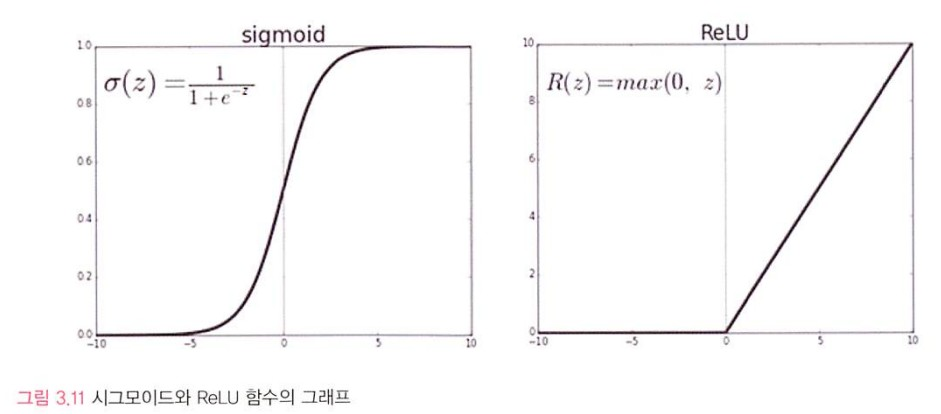

활성화 함수로는 시그모이드, ReLU 등을 주로 쓰게 된다.
ReLU는 정류된 선형함수라는 뜻
딥러닝에서 선형함수는 y=x 라는 식으로 정의할수 있는 입력과 출력이 동일한 함수를 의미한다. 이 함수를 정류하여 음수 값을 0으로 만든 것이 ReLU다.

시그모이드는 출력값을 0 ~ 1으로 제한 하지만 ReLU는 양수를 그대로 반환하기 때문에 값의 왜곡이 적어진다.

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

math모듈은 상수 e의 제곱을 계산하기 위한 math.exp()를 사용하는데 필요하다.
1/(1+math.exp(-x)) 는 시그모이드 함수를 취한값

In [ ]:
x=1
y=0
w= tf.random.normal([1],0,1)
output = sigmoid(x*w)
print(output)

0.5994023168569182


기대출력값 0 - 실제출력값 = 에러(error) 에러가 0에 가까워질수록 기대값에 가까운 값이다.
뉴런이란 결국 w값이다. w를 변화 시키기 위해서 경사하강법(Gradient Decent)라는 방법을 사용한다. 

경사하강법 w = w + x * 학습률 * 에러 의 값이다.

In [ ]:
for i in range(1000):
  output = sigmoid(x*w)
  error = y - output ## 기댓값 y - 실제출력값 output
  w = w+ x*0.1*error

  if i % 100 == 99:
    print(i, error, output)

99 -0.10925947234342501 0.10925947234342501
199 -0.05426564548614899 0.05426564548614899
299 -0.03570068079269467 0.03570068079269467
399 -0.026512187237920645 0.026512187237920645
499 -0.021055315555168465 0.021055315555168465
599 -0.017448435059407002 0.017448435059407002
699 -0.014890141821109893 0.014890141821109893
799 -0.01298257064566223 0.01298257064566223
899 -0.011506142223335581 0.011506142223335581
999 -0.010329878051671772 0.010329878051671772


In [ ]:
x = 0
y = 1
w = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w)
  error = y - output 
  w = w+ x*0.1*error

  if i % 100 == 99:
    print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


x = 0 이기 때문에 w값은 변함이 없다. 이러한 경우를 방지하기 위해서 편향값 b를 넣어준다. 한쪽으로 치우친 고정값(1)을 받아서 입력으로 0 을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지한다. 편향은 난수처럼 초기화 되어 뉴런에 더해져서 출력을 계산하게 된다. 관용적으로 1을 사용한다.

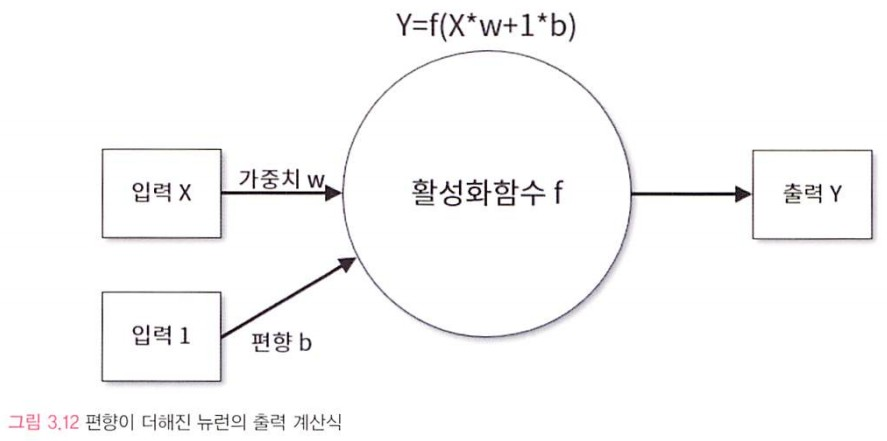

In [ ]:
x = 0
y = 1
w = tf.random.normal([1],0,1)
b = tf.random.normal([1],0,1)

for i in range(1000):
  output = sigmoid(x*w + 1*b)
  error = y - output 
  w = w+ x*0.1*error
  b = b+ 1*0.1*error

  if i % 100 == 99:
    print(i, error, output)

99 0.11827373757247972 0.8817262624275203
199 0.0565411140437565 0.9434588859562435
299 0.036691007352449456 0.9633089926475505
399 0.027059628044212802 0.9729403719557872
499 0.02140101537864425 0.9785989846213557
599 0.01768603520811418 0.9823139647918858
699 0.015063265842404583 0.9849367341575954
799 0.013114240101004482 0.9868857598989955
899 0.011609551683860131 0.9883904483161399
999 0.010413261057568568 0.9895867389424314


### 첫번째 신경망 네트워크 AND

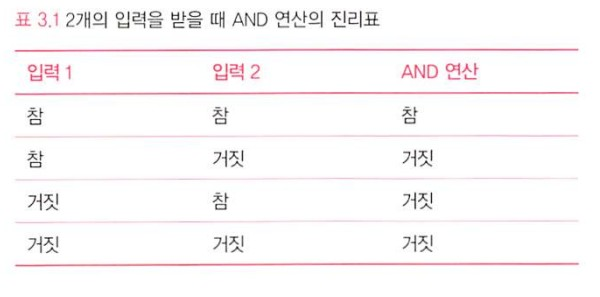

AND연산자는 입력이 모두 참일때 참이 된다. 그밖에는 거짓이 된다.

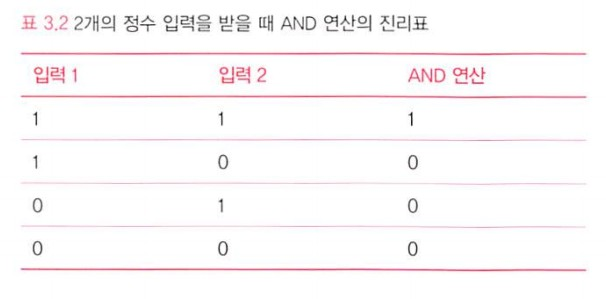

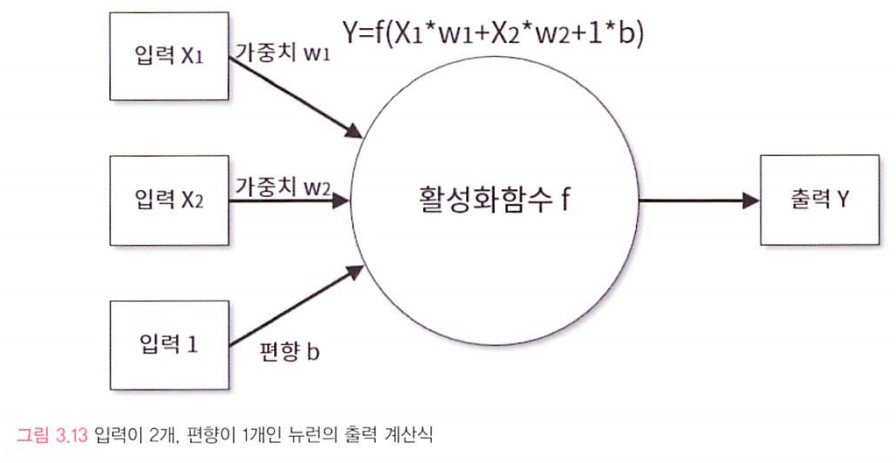

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w+ x[j]*0.1*error
    b = b+ b_x*0.1*error
    error_sum +=error
  if i % 200 == 199:
    print(i,error_sum)

199 -0.10383780272465039
399 -0.0633696593542225
599 -0.04546899345586928
799 -0.03535524006478863
999 -0.028871642340505557
1199 -0.024370305934292222
1399 -0.02106814323401242
1599 -0.018544294355205836
1799 -0.016554569177824757
1999 -0.014945777853967212


x, y를 array로 정의 w = w+ x[j]*0.1*error부분을 빠르게 정리하기 위해서 사용

In [ ]:
print([1,2,3]*2)
print([1,2,3]*0)
print([1,2,3]*-1)

[1, 2, 3, 1, 2, 3]
[]
[]


양수일때 숫자만큼 곱한다. 0이하는 빈리스트, 실수를곱하면 에러

In [ ]:
import numpy as np

print(np.array([1,2,3])*2)
print(np.array([1,2,3])*0)
print(np.array([1,2,3])*-1)
print(np.array([1,2,3])*0.01)

[2 4 6]
[0 0 0]
[-1 -2 -3]
[0.01 0.02 0.03]


자동으로 실수를 곱하는 연산이 이루어짐. 이를 각 원소에 대한 연산
리스트가 아닌 넘파이array로 자동 변환된다.

In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9651084848495359
X: [1 0] Y: [0] Output: 0.024726926522829287
X: [0 1] Y: [0] Output: 0.02480223112439935
X: [0 0] Y: [0] Output: 2.331179598209712e-05


cost가 점점 줄어든다

### 두번째 신경망 네트워크: OR

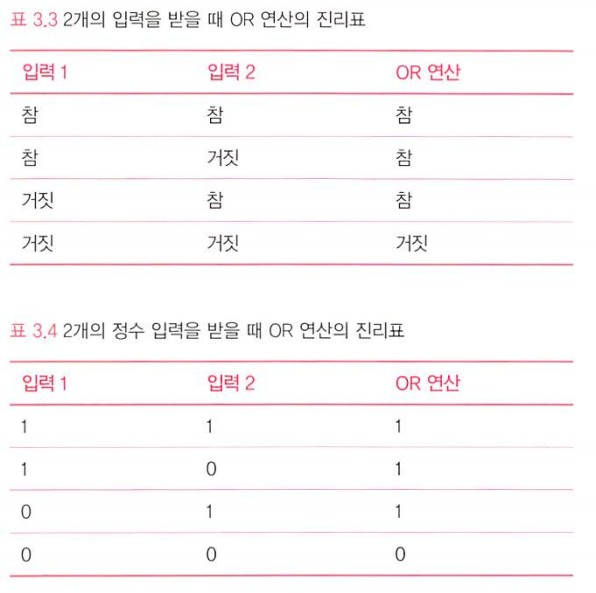

둘중 하나만 참이어도 참이된다. 모두 거짓일때만 거짓이 된다.

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w+ x[j]*0.1*error
    b = b+ b_x*0.1*error
    error_sum +=error
  if i % 200 == 199:
    print(i,error_sum)

199 -0.04490443103913608
399 -0.024547479491314486
599 -0.016777977130644994
799 -0.012702336391650297
999 -0.010202237596478626
1199 -0.008515871268400317
1399 -0.007303701234643058
1599 -0.006390596201309023
1799 -0.005679369977315597
1999 -0.005108201771201189


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999972728379996
X: [1 0] Y: [1] Output: 0.9898695213935002
X: [0 1] Y: [1] Output: 0.9898498211775819
X: [0 0] Y: [0] Output: 0.025328751141078968


학습수가 커질수록 실제 출력이 기대출력에 가까워진다.

### 세번째 신경망 네트워크: XOR

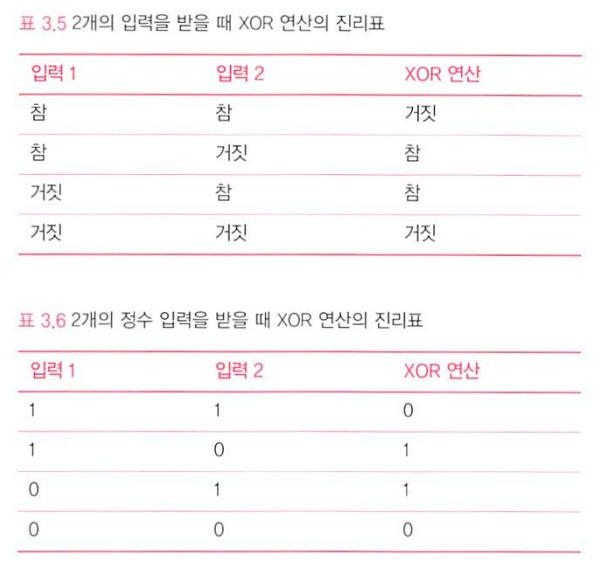

홀수 개의 입력이 참일 때만 결괏값이 참이 된다.

In [ ]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000):
  error_sum = 0
  for j in range(4):
    output = sigmoid(np.sum(x[j]*w)+b_x*b)
    error = y[j][0] - output
    w = w+ x[j]*0.1*error
    b = b+ b_x*0.1*error
    error_sum +=error
  if i % 200 == 199:
    print(i,error_sum)

199 0.00509223053416652
399 0.00020698592609558197
599 8.415497976033137e-06
799 3.5180860613603926e-07
999 1.8614211283463078e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [ ]:
for i in range(4):
  print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485


In [ ]:
print('w:',w)
print('b:',b)

w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


w에 순차적으로 x가 곱해지기 때문에 첫 번째 입력이 두번째 입력보다 큰영향을 끼치고, 편향은 두번째 입력과 비슷하게 거의 영향이 없다.

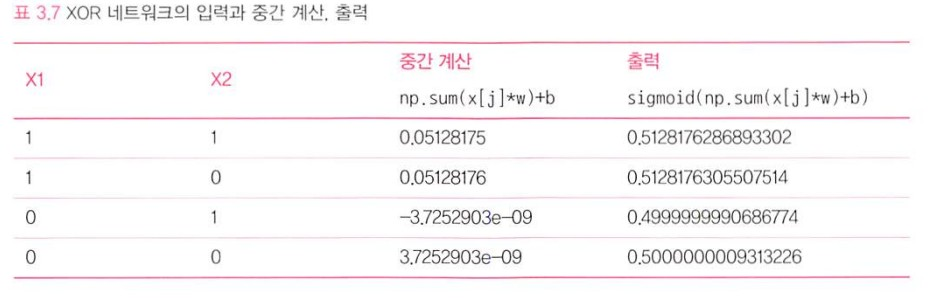

중간값이 0 에 가까워 지기 때문에 최종 출력이 0.5에 가까워진다.
첫번째 입력에 따라 중간 계산값은 크게 달라지지만 출력에서는 별 차이가 없다.

In [ ]:
# w: tf.Tensor([6.9484286 6.951607 ], shape=(2,), dtype=float32)
# b: tf.Tensor([-10.601849], shape=(1,), dtype=float32)

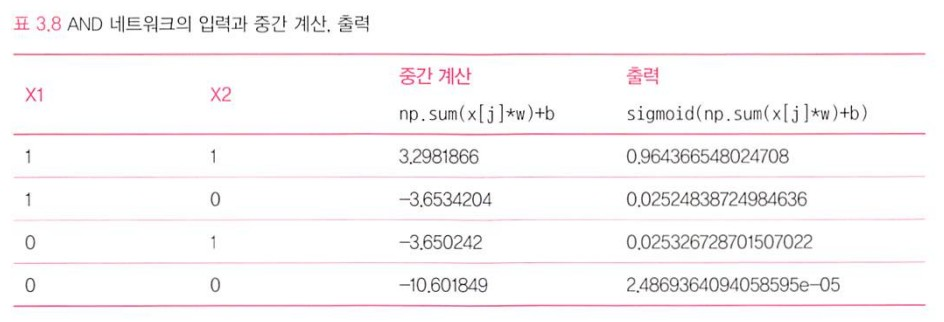

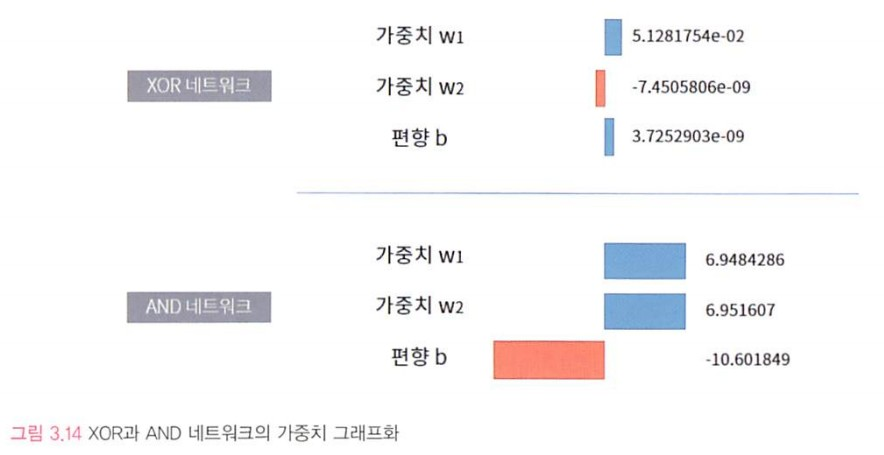

AND네트워크의 가중치가 하려는 작업은 XOR 네트워크에 비해 분명하다.
두 가중치가 비슷하기 때문에 입력 2개는 서로 비슷한 중요도를 가진다.
편향값은 음수인데 이것은 중간 계산값을 음수로 보내는 경향을 가진다.
두 가중치 모두 합쳐야 음수 편향을 이긴다.

XOR네트워크는 어떤 일을 하려는지 명확하지 않다. 가중치의 중간 계산값은 0에 가까워지고, 시그모이드 함수는 0.5에 가까워질뿐이다.

문제를 해결하기 위해서 여러개의 퍼셉트론을 사용한다.

In [ ]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


model은 딥러닝 계산을 위한 여러 함수와 변수의 묶음이다.

tf.keras.Sequential구조는 제일 많이쓰인다. 순차적으로 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것이다.

In [ ]:

#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
#    tf.keras.layers.Dense(units=1, activation='sigmoid')


-Dense는 가장 기본적인 레이어 입력 출력 사이에 있는 모든 뉴런이 서로 연결된 레이어다. 
-units은 레이어를 구성하는 뉴런의 수를 정의한다. 많을수록 성능은 좋지만 메모리를 많이 차지한다. 
-activation은 활성화함수다.
-input_shape은 시퀀셜 모델의 첫번째 레이어에서만 정의한다. 입력의 차원 수가 어떻게 되는지를 정의한다.

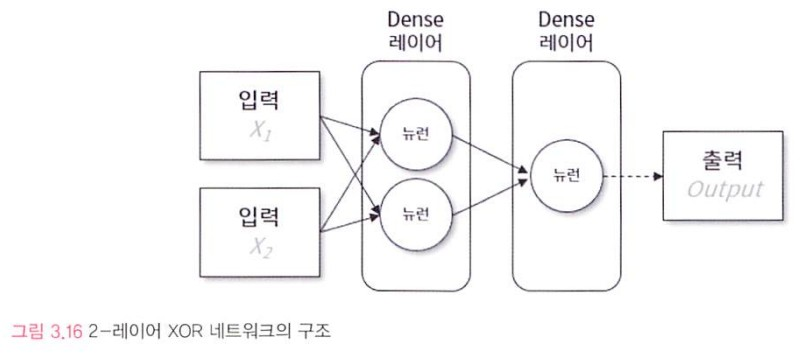

실선 화살표는 가중치를 나타낸다. 두번째 레이어의 결과에 활성화 함수를 취한 결과가 바로 출력되기때문에 마지막 화살표는 가중치로 치지 않는다

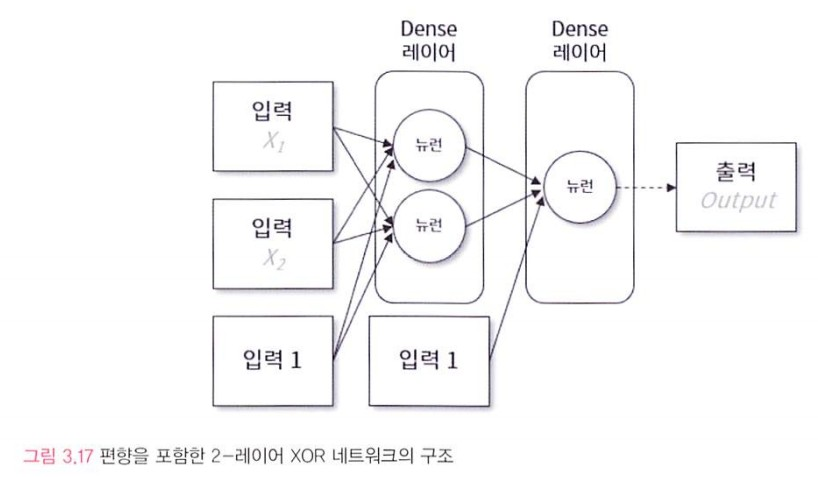

Dense 레이어의 파라미터 수는 (입력측 뉴런의 수 +1) X (출력측 뉴런의 수)

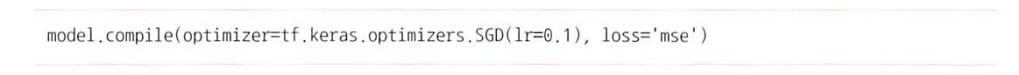

최적화 함수는 딥러닝의 학습식을 정의하는부분이다. SGD는 확률적 경사 하강법이다. 가중치를 업데이트 할때 미분을 통해 기울기를 구한다음 기울기가 낮은쪽으로 업데이트 한다. 확률적은 전체를 한번에 계산하지 않고 확률적으로 일부 샘플을 구해서 계산한다는 뜻이다. 

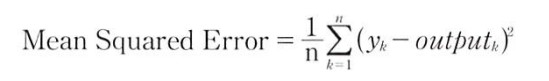

손실은 기대 출력에서 실제출력을 뺀뒤에 제곱한 값을 평균 하는 것이다. 에러와 비슷하다

In [ ]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2906
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2809
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2757
Epoch 4/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2726
Epoch 5/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2700
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 7/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2676
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2664
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2669
Epoch 10/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2654
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 12/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2647
Epoch 13/2000
4/4 [==============================

에포크에지정한 수만큼 학습시킨다. batch_size는 한번에 학습시키는 데이터 수 x y는 입력고 기대출력을 의미한다.

In [ ]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
model.predict(x)

array([[0.0412288 ],
       [0.9606533 ],
       [0.9594633 ],
       [0.04633496]], dtype=float32)

In [ ]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-5.2044806,  5.5324497],
       [ 4.968101 , -5.6454806]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-2.7921388, -3.1452115], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[7.7374897],
       [7.6195927]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-3.785799], dtype=float32)>


kernel은 입력과 레이어 또는 레이어 사이의 뉴런을 연결할때 사용되는 가중치이다.
bias는 편향과 연결된 가중치 이다.

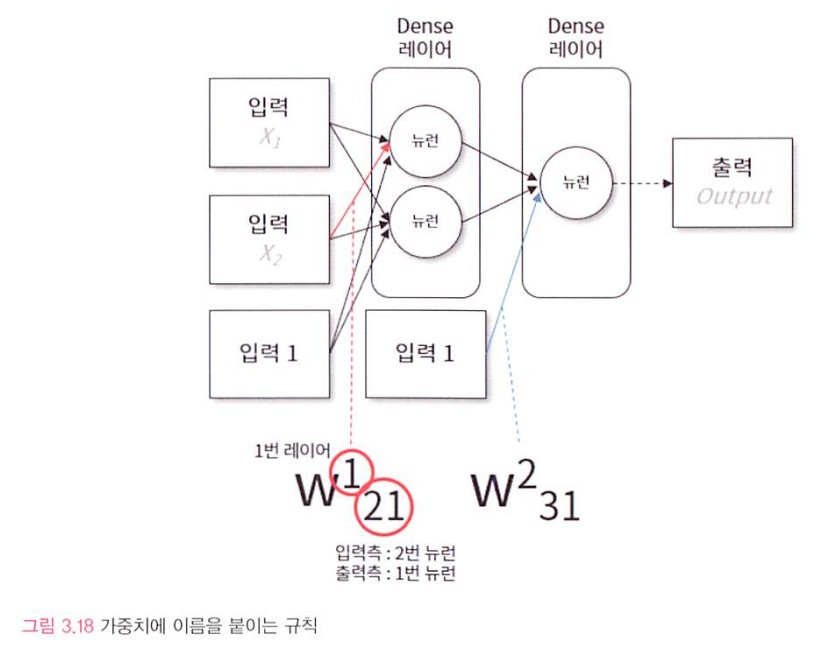

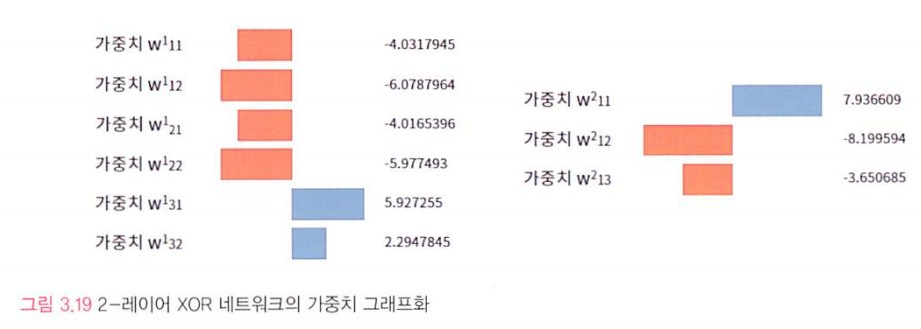

## 시각화 기초

### matplotlib.pyplot을 이용한 그래프 그리기

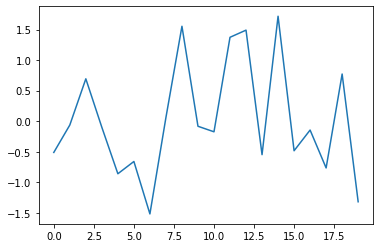

In [ ]:
# 3.31 간단한 꺾은선 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y)
plt.show()

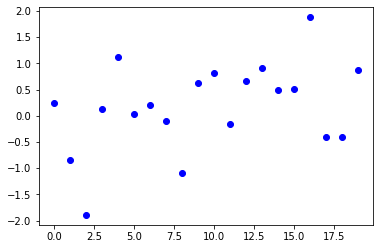

In [ ]:
# 3.32 간단한 점 그래프 그리기
import matplotlib.pyplot as plt
x = range(20)
y = tf.random.normal([20],0,1)
plt.plot(x,y,'bo')
plt.show()

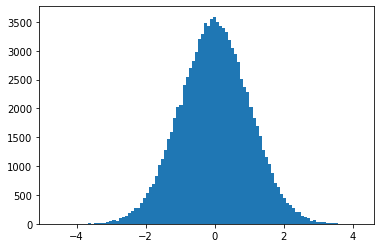

In [ ]:
# 3.33 정규분포 그래프를 히스토그램으로 나타내기
import matplotlib.pyplot as plt
random_normal = tf.random.normal([100000],0,1)
plt.hist(random_normal, bins=100)
plt.show()

### 2-레이어 XOR 네트워크의 정보 시각화

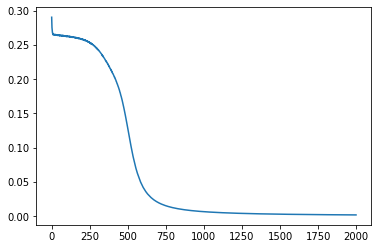

In [ ]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])